# Masks

In this notebook we demonstrate all of NetCDF-SCM's known masks. These masks are used to decide e.g. which regions are ocean and which are land, where the El Nino box is. Here we show the default masks. However, if land surface fraction data is available then that is used to decide where land/ocean beging/end instead.

TODO: show user defined masks?

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
from os.path import join
    
import numpy as np
import iris
import iris.quickplot as qplt
import matplotlib.pyplot as plt

from netcdf_scm.iris_cube_wrappers import MarbleCMIP5Cube
from netcdf_scm.masks import get_area_mask, MASKS

<IPython.core.display.Javascript object>

In [2]:
plt.style.use('bmh') 
%matplotlib inline

## Data path

Here we use our test data.

In [3]:
DATA_PATH_TEST = join("..", "tests", "test-data")
DATA_PATH_TEST_MARBLE_CMIP5_ROOT = join(DATA_PATH_TEST, "marble-cmip5")

## Load the cube

In [4]:
tas = MarbleCMIP5Cube()
tas.load_data_from_identifiers(
    root_dir=DATA_PATH_TEST_MARBLE_CMIP5_ROOT,
    activity="cmip5",
    experiment="1pctCO2",
    modeling_realm="Amon",
    variable_name="tas",
    model="CanESM2",
    ensemble_member="r1i1p1",
    time_period="185001-198912",
    file_ext=".nc",
)

## Masks

### Default masks

By default, only land/ocean and hemispheric masks are considered.

In [5]:
default_masks = tas.get_scm_cubes()

Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working


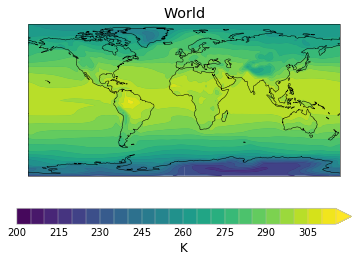

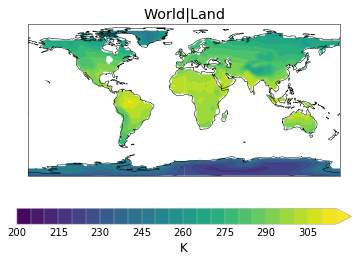

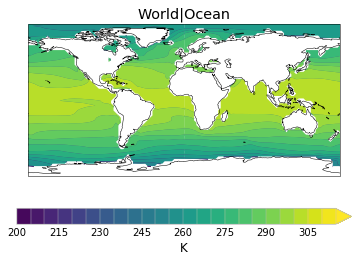

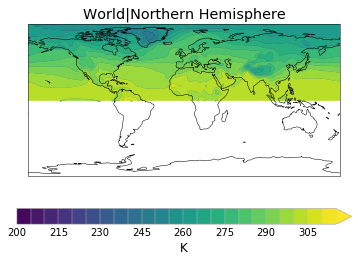

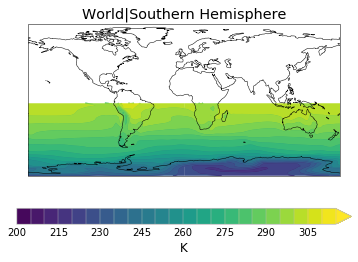

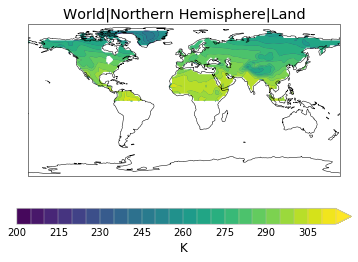

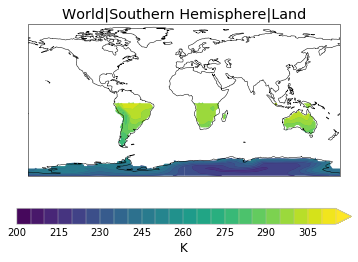

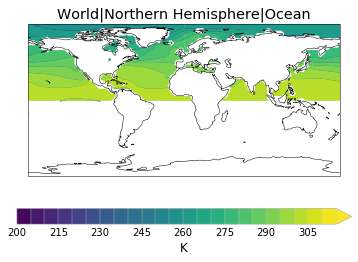

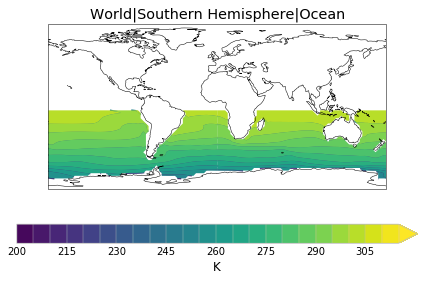

In [6]:
def plot_masks(plt_masks):
    for i, (label, cube) in enumerate(plt_masks.items()):
        ax = plt.figure().add_subplot(111)

        region_time_mean = cube.cube.collapsed('time', iris.analysis.MEAN)
        qplt.contourf(
            region_time_mean, 
            levels=np.arange(200, 320, 5), 
            extend='max',
        )
        plt.title(label)
        plt.gca().coastlines()


    plt.tight_layout()
    
plot_masks(default_masks)

### All inbuilt masks

The default masks do not contain all inbuilt masks. We can use all available inbuilt masks instead.

In [7]:
all_inbuilt_masks = tas.get_scm_cubes(masks=MASKS.keys())

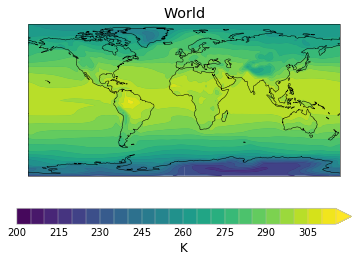

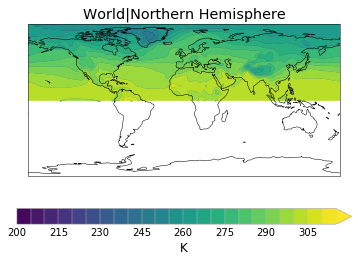

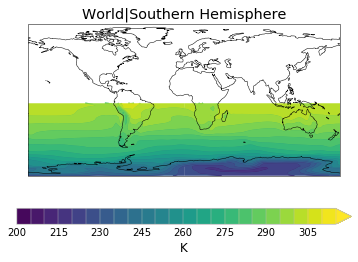

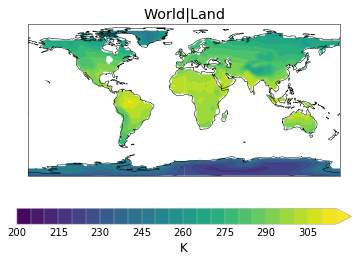

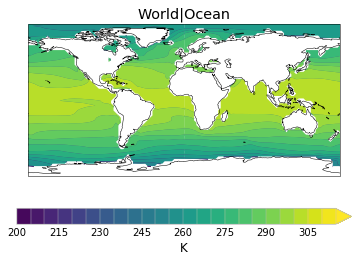

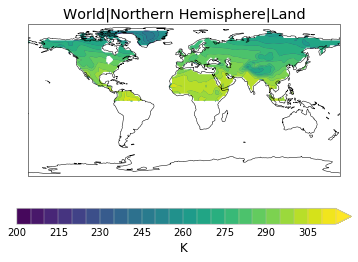

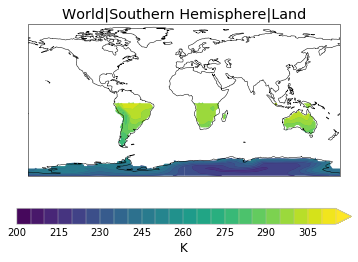

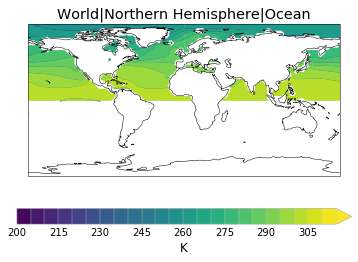

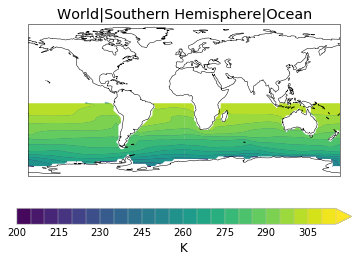

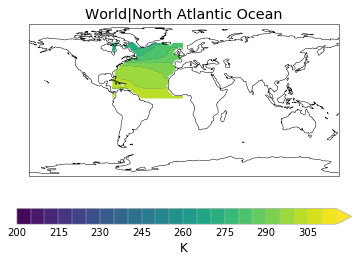

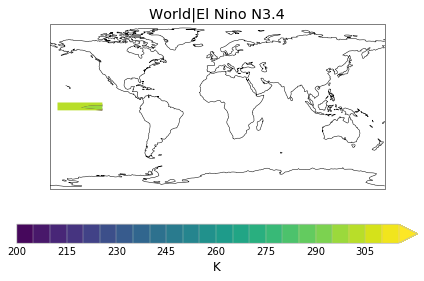

In [8]:
plot_masks(all_inbuilt_masks)

### User-defined masks

As a user, you can also define masks. Simply add them to `netcdf_scm.masks.MASKS` and then use them in your `get_scm_cubes` call.

In [9]:
MASKS["custom mask"] = get_area_mask(-40, -40, 60, 70)

In [10]:
custom_mask = tas.get_scm_cubes(masks=["World|El Nino N3.4", "custom mask", "World|Land"])

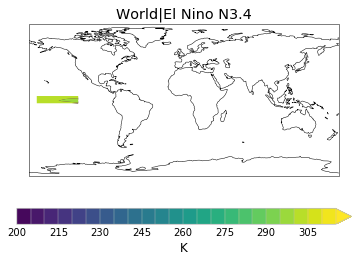

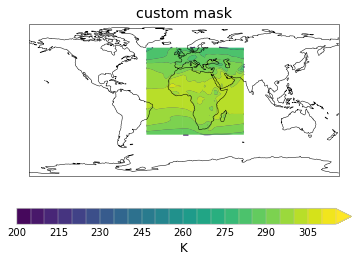

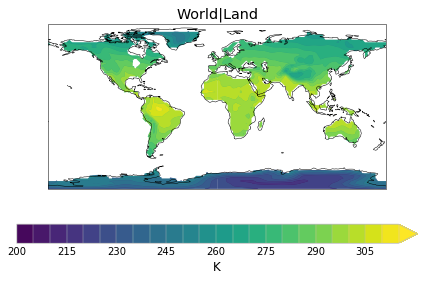

In [11]:
plot_masks(custom_mask)